In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [3]:
df.sample(100)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
231,ham,Dear we are going to our rubber place,NaN,NaN,NaN
2556,ham,Fuck babe ... What happened to you ? How come ...,NaN,NaN,NaN
107,ham,How would my ip address test that considering ...,NaN,NaN,NaN
4462,ham,He said i look pretty wif long hair wat. But i...,NaN,NaN,NaN
1660,ham,No just send to you. Bec you in temple na.,NaN,NaN,NaN
...,...,...,...,...,...
3596,spam,Congratulations YOU'VE Won. You're a Winner in...,NaN,NaN,NaN
13,ham,I've been searching for the right words to tha...,NaN,NaN,NaN
3706,ham,Aight do you still want to get money,NaN,NaN,NaN
194,ham,How are you doing? Hope you've settled in for ...,NaN,NaN,NaN


In [4]:
##DataCleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(10)

,v1,v2
4175,ham,He's in lag. That's just the sad part but we k...
3773,ham,Ok... But bag again..
5303,ham,"I can. But it will tell quite long, cos i have..."
1417,ham,No wonder... Cos i dun rem seeing a silver car...
4464,ham,\CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I ...
3104,ham,Or remind me in a few hrs.
1566,ham,I am late. I will be there at
500,ham,"Fighting with the world is easy, u either win ..."
4755,ham,Don't make life too stressfull.. Always find t...
1421,ham,Do you work all this week ?


In [8]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
4199,ham,I will come tomorrow di
3319,ham,Eh sorry leh... I din c ur msg. Not sad alread...
3241,ham,Good Morning my Dear........... Have a great &...
5347,ham,No sir. That's why i had an 8-hr trip on the b...
1356,ham,U ned to convince him tht its not possible wit...
4882,ham,"New Theory: Argument wins d SITUATION, but los..."
4097,ham,I think just yourself Û_Thanks and see you tomo
4350,ham,"Night has ended for another day, morning has c..."
196,ham,Did u got that persons story
1467,ham,I wont touch you with out your permission.


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicate values
df.duplicated().sum()

403

In [14]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
#EDA--exploratory data analysis

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
!pip install nltk

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\RITTIKA
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df = df.copy()
df['num_characters'] = df['text'].apply(len)


In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

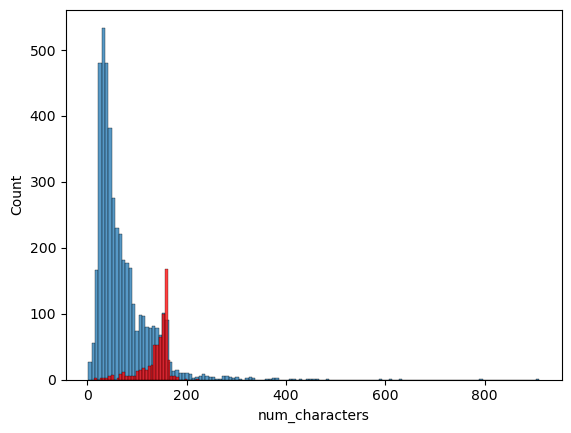

In [32]:

sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

C:\Users\RITTIKA SINGH\AppData\Local\Temp\ipykernel_14948\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

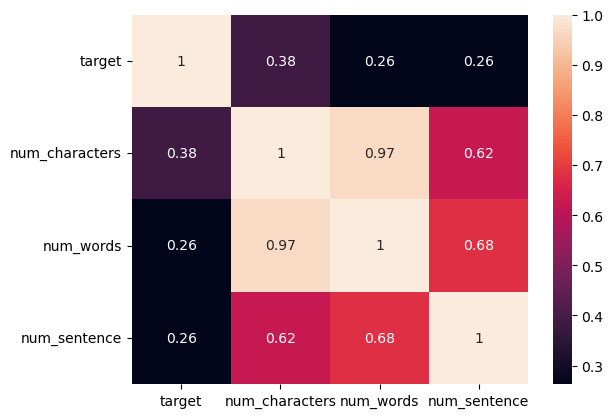

In [33]:
sns.heatmap(df.corr(),annot=True)

In [34]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\RITTIKA
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
transform_text('I loved the youtube lecture. how about you? ')

'love youtub lectur'

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('singing')

'sing'

In [41]:
from sklearn.utils import resample
df['transformed_text']=df['text'].apply(transform_text)
spam_df = df[df['target'] == 1]
ham_df = df[df['target'] == 0]
spam_upsampled = resample(spam_df,
                          replace=True,
                          n_samples=len(ham_df),
                          random_state=42)
df_balanced = pd.concat([ham_df, spam_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
!pip install wordcloud


In [44]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

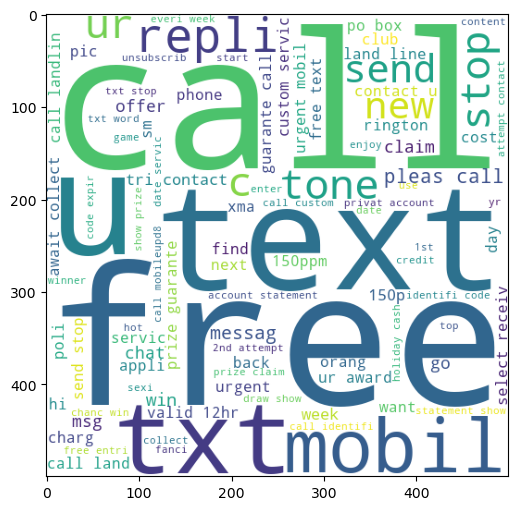

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

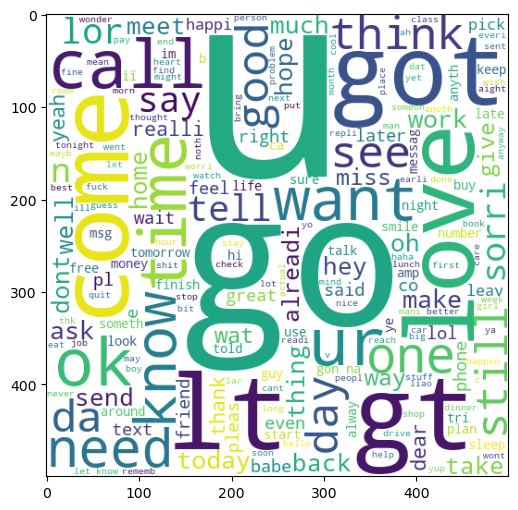

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [50]:
len(spam_corpus)

9939

In [51]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

In [52]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35404

In [54]:
pd.DataFrame(Counter(ham_corpus).most_common(30))[1]

0     883
1     404
2     349
3     288
4     287
5     284
6     275
7     236
8     236
9     234
10    233
11    219
12    217
13    216
14    213
15    208
16    197
17    190
18    170
19    165
20    159
21    156
22    152
23    149
24    147
25    143
26    143
27    142
28    133
29    129
Name: 1, dtype: int64

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [56]:
X=tfidf.fit_transform(df_balanced['transformed_text']).toarray()

In [57]:
X.shape

(9032, 6708)

In [58]:
y=df_balanced['target'].values

In [59]:
y

array([0, 1, 1, ..., 1, 0, 1])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:

mnb= MultinomialNB()


In [64]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9784172661870504
[[857  26]
 [ 13 911]]
0.9722518676627535


In [65]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [66]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

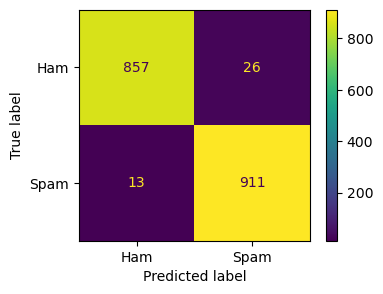

In [69]:
y_pred = mnb.predict(X_test)

# Use numeric labels 0 = ham, 1 = spam
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Display confusion matrix with readable labels
fig, ax = plt.subplots(figsize=(4, 3))  # 👈 change width and height here
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(ax=ax)
plt.show()

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.99      0.97      0.98       883
        Spam       0.97      0.99      0.98       924

    accuracy                           0.98      1807
   macro avg       0.98      0.98      0.98      1807
weighted avg       0.98      0.98      0.98      1807



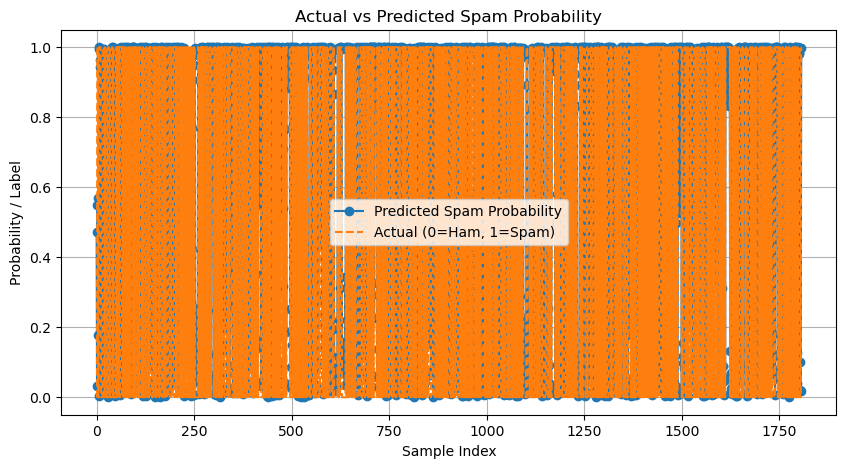

In [71]:
import matplotlib.pyplot as plt

# Get predicted probabilities (not just class labels)
y_prob = mnb.predict_proba(X_test)[:, 1]  # Probability of being Spam

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_prob, marker='o', label='Predicted Spam Probability')
plt.plot(y_test, linestyle='--', label='Actual (0=Ham, 1=Spam)')
plt.title("Actual vs Predicted Spam Probability")
plt.xlabel("Sample Index")
plt.ylabel("Probability / Label")
plt.legend()
plt.grid()
plt.show()
